In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
data_digits=load_digits()

<Figure size 640x480 with 0 Axes>

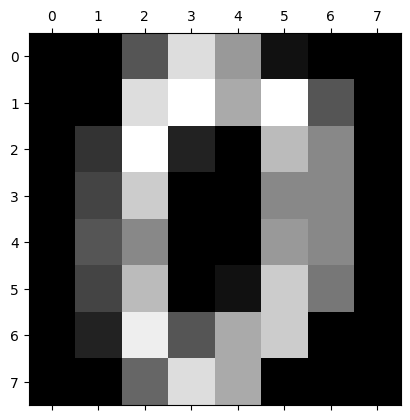

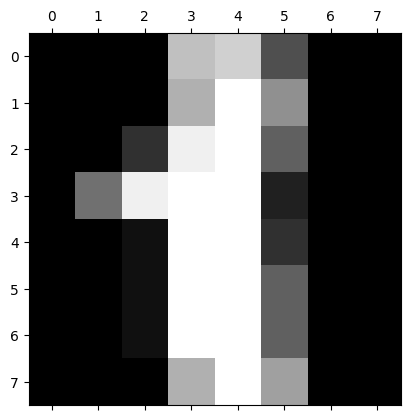

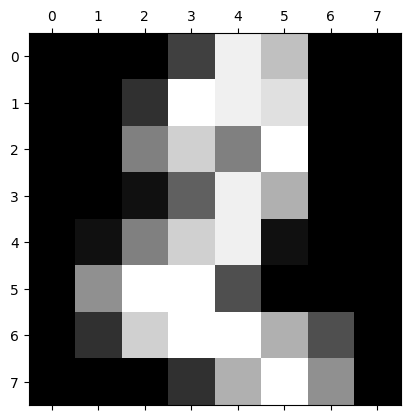

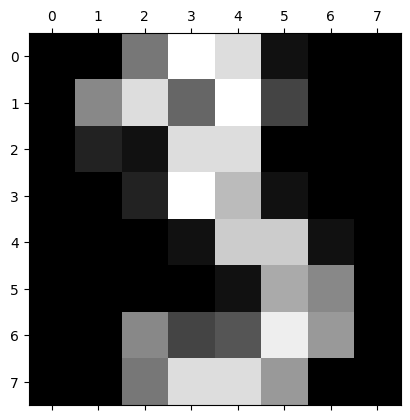

In [6]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(data_digits.images[i])

In [7]:
df=pd.DataFrame(data_digits.data)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
df['target']=data_digits.target

In [13]:
x=df.drop(columns=['target'])

In [14]:
y=df.target

In [12]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
len(X_test)

360

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model=RandomForestClassifier(n_estimators=30)

In [34]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [35]:
model.score(X_test,y_test)

0.975

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_predicted=model.predict(X_test)

In [38]:
cm=confusion_matrix(y_test,y_predicted)

In [39]:
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 32,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 32]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted')

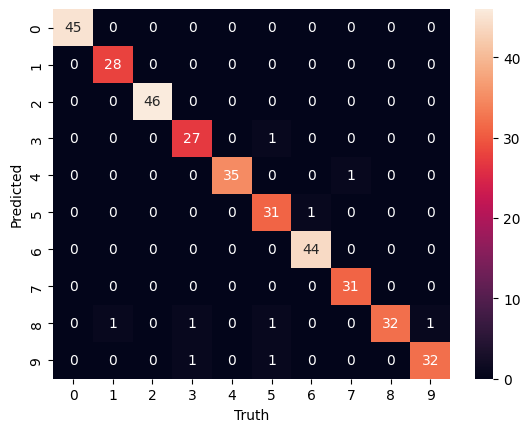

In [40]:
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')